# OUTLINE:

1.   Import libraries and dataset
2.   Preprocessing (Missing Values & Feature Encoding)
3.   Data Visualization
4.   Modeling

Note: Feature selection & feature engineering were skipped. Feature Selection was skipepd because the dataset being used doesn't have many features anyway, so kitchen-sink model will suffice. Additionally, feature engineering (such as interaction terms) are not used here for sake of simplicty.



# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [5]:
#Data taken from Kaggle
df=pd.read_csv('/content/heart.csv')
df.head()
#5 numerical features and 7 categorical features (12 total)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0


In [6]:
df.shape #12 features (with DV) & 918 rows

(918, 12)

# Preprocessing: Dealing with Missing Values

In [7]:
df.isnull().sum()

,0
Age,18
Sex,0
ChestPainType,13
RestingBP,0
Cholesterol,9
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
df=df.dropna() #Not too many missing values (total of 48 values), they will be dropped for simplicity

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0


# Preprocessing: Encoding Categorical Features

In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data_transformed = df.copy(deep=True)

# Label encoding for binary categories (Sex, FastingBS, ExerciseAngina, HeartDisease)
binary_columns = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']
for col in binary_columns:
    le = LabelEncoder()
    data_transformed[col] = le.fit_transform(data_transformed[col])

# One-hot encoding for multi-category features (ChestPainType, RestingECG, ST_Slope)
data_transformed = pd.get_dummies(data_transformed, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], dtype=int)

# Display transformed data
data_transformed.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,1,140,289.0,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49.0,0,160,180.0,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37.0,1,130,283.0,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48.0,0,138,214.0,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54.0,1,150,195.0,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


# Data Visualizations of features

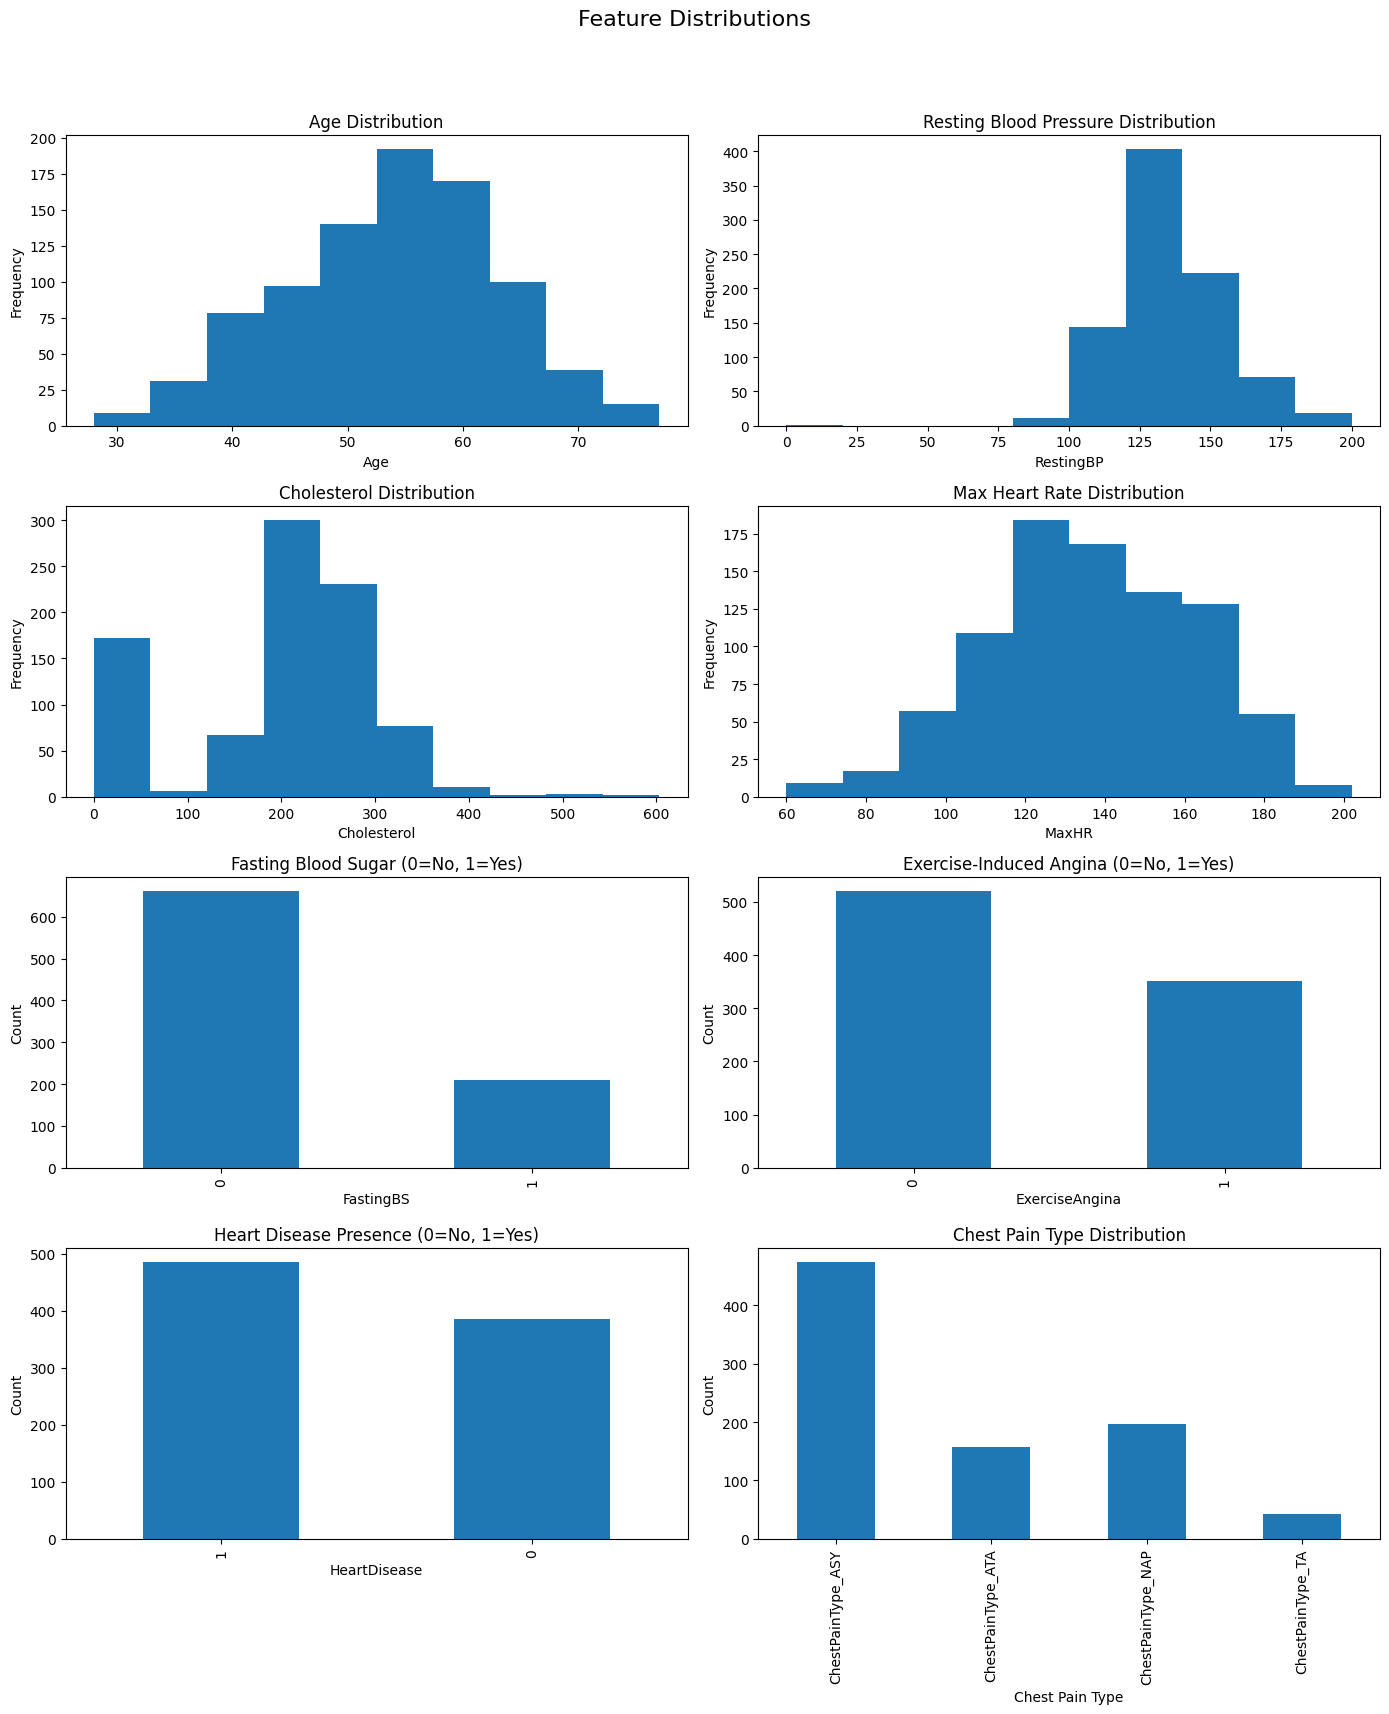

In [14]:
import matplotlib.pyplot as plt

# Set up the figure and axis grid for organized layout
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.suptitle('Feature Distributions', fontsize=16)

# Age Distribution
data_transformed['Age'].plot(kind='hist', bins=10, ax=axes[0, 0], title='Age Distribution')
axes[0, 0].set_xlabel('Age')

# Resting Blood Pressure Distribution
data_transformed['RestingBP'].plot(kind='hist', bins=10, ax=axes[0, 1], title='Resting Blood Pressure Distribution')
axes[0, 1].set_xlabel('RestingBP')

# Cholesterol Distribution
data_transformed['Cholesterol'].plot(kind='hist', bins=10, ax=axes[1, 0], title='Cholesterol Distribution')
axes[1, 0].set_xlabel('Cholesterol')

# Max Heart Rate Distribution
data_transformed['MaxHR'].plot(kind='hist', bins=10, ax=axes[1, 1], title='Max Heart Rate Distribution')
axes[1, 1].set_xlabel('MaxHR')

# Fasting Blood Sugar Distribution
data_transformed['FastingBS'].value_counts().plot(kind='bar', ax=axes[2, 0], title='Fasting Blood Sugar (0=No, 1=Yes)')
axes[2, 0].set_xlabel('FastingBS')
axes[2, 0].set_ylabel('Count')

# Exercise-Induced Angina Distribution
data_transformed['ExerciseAngina'].value_counts().plot(kind='bar', ax=axes[2, 1], title='Exercise-Induced Angina (0=No, 1=Yes)')
axes[2, 1].set_xlabel('ExerciseAngina')
axes[2, 1].set_ylabel('Count')

# Heart Disease Presence
data_transformed['HeartDisease'].value_counts().plot(kind='bar', ax=axes[3, 0], title='Heart Disease Presence (0=No, 1=Yes)')
axes[3, 0].set_xlabel('HeartDisease')
axes[3, 0].set_ylabel('Count')

# Chest Pain Type Distribution
data_transformed[['ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']].sum().plot(
    kind='bar', ax=axes[3, 1], title='Chest Pain Type Distribution')
axes[3, 1].set_xlabel('Chest Pain Type')
axes[3, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


# **# Modeling: Decision Tree & Random Forest**

Why these two models?
Since the assignment requires two classification models, I aim to keep things straightforward. To avoid re-encoding categorical features due to multicollinearity concerns, I am picking 2 models that are either both sensitive or both insensitive to multicollinearity.

Decision Tree & Random forest are both insensitive to multicollinearity and as an added bonus, they don't require feature scaling, which is one less step I need to worry about





In [15]:
# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define X (features) and y (target)
X = data_transformed.drop('HeartDisease', axis=1)
y = data_transformed['HeartDisease']

# Split data into training and test sets with an 80-20 split
# Reasoning: An 80-20 split is standard and provides a balanced training set while holding out a significant portion for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree Classifier
# Setting max_depth and min_samples_leaf to avoid overfitting and improve generalization
# Random state is set to 42 for reproducibility
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
decision_tree.fit(X_train, y_train)

# Model 2: Random Forest Classifier
# Using 100 estimators (trees), max_depth of 5, and min_samples_leaf of 10 for consistency with the Decision Tree and to prevent overfitting
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluation

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        80
           1       0.88      0.89      0.89        95

    accuracy                           0.87       175
   macro avg       0.87      0.87      0.87       175
weighted avg       0.87      0.87      0.87       175

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        80
           1       0.87      0.96      0.91        95

    accuracy                           0.90       175
   macro avg       0.90      0.89      0.90       175
weighted avg       0.90      0.90      0.90       175



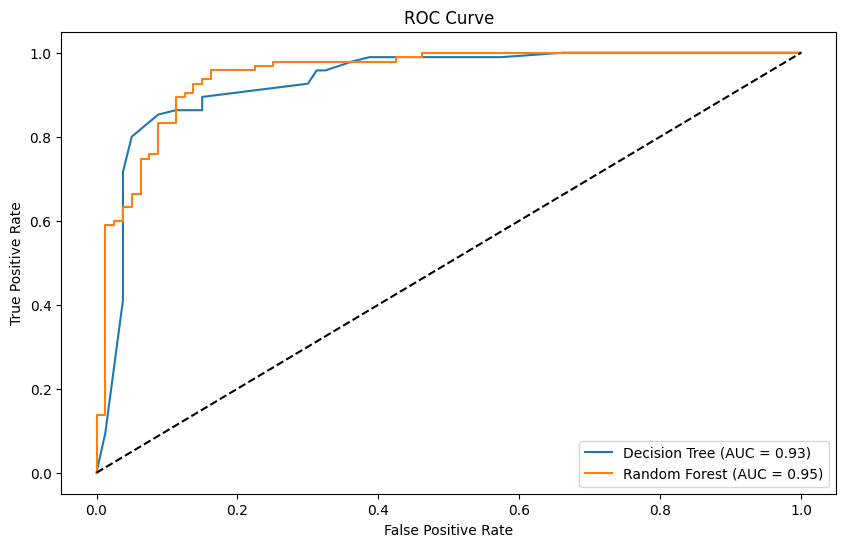

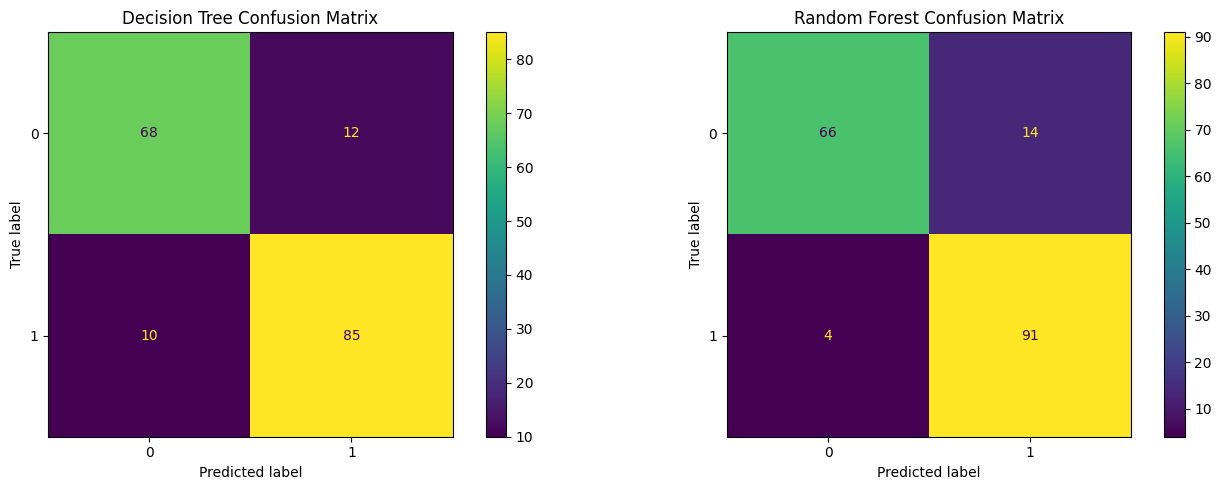

In [16]:
# Evaluation Metrics
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# ROC Curve for both models
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_dt)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot(ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

Summary

**Overall Performance: Both models perform well, but the Random Forest model slightly outperforms the Decision Tree in terms of accuracy (0.90 vs. 0.87) and ROC AUC score.**

**Recommendation: The Random Forest model could be a better choice if minimizing false negatives is a priority, as it has higher recall for positive cases (0.96) and higher overall accuracy. This is beneficial in scenarios where identifying heart disease cases is critical.**